<a href="https://colab.research.google.com/github/Sehastrajit-clg/Deep-Learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion dataset Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


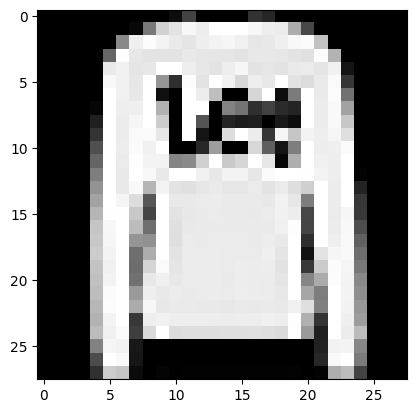

In [27]:
imgplot = plt.imshow(x_test[1])
imgplot

In [3]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)


In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [17]:
encoded_imgs[0]

array([2.2716084 , 3.5359297 , 4.7720394 , 1.1122088 , 2.1293335 ,
       4.5010242 , 0.7070123 , 2.7889984 , 1.1041064 , 3.0248427 ,
       1.1210514 , 4.2308135 , 2.5602996 , 3.6702104 , 2.2959945 ,
       1.623673  , 2.8833804 , 2.941417  , 2.3669174 , 2.190681  ,
       3.9105988 , 0.        , 0.        , 1.2966436 , 0.757506  ,
       1.2768183 , 2.6207514 , 0.508834  , 2.9085398 , 4.65243   ,
       0.9628993 , 1.7356169 , 1.4155364 , 2.7138865 , 2.9910054 ,
       2.895526  , 2.016715  , 3.5953019 , 1.93549   , 0.8629961 ,
       1.1984055 , 0.30700564, 1.2159128 , 2.341546  , 2.1495016 ,
       1.7367283 , 0.8258023 , 2.819625  , 2.8734708 , 2.4515705 ,
       1.8670312 , 5.7145233 , 2.0004487 , 1.0665612 , 4.425045  ,
       2.7192998 , 2.0841708 , 1.8748112 , 1.9846158 , 2.1497335 ,
       2.4800775 , 2.4553723 , 4.7990155 , 1.8363326 ], dtype=float32)

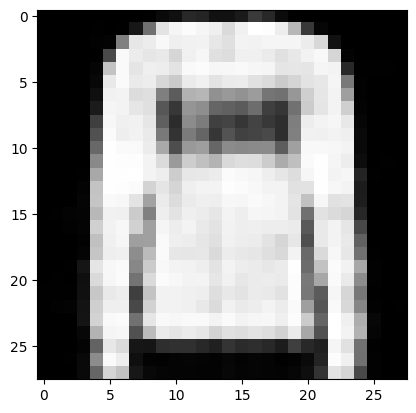

In [22]:
imgplot = plt.imshow(decoded_imgs[1])
imgplot

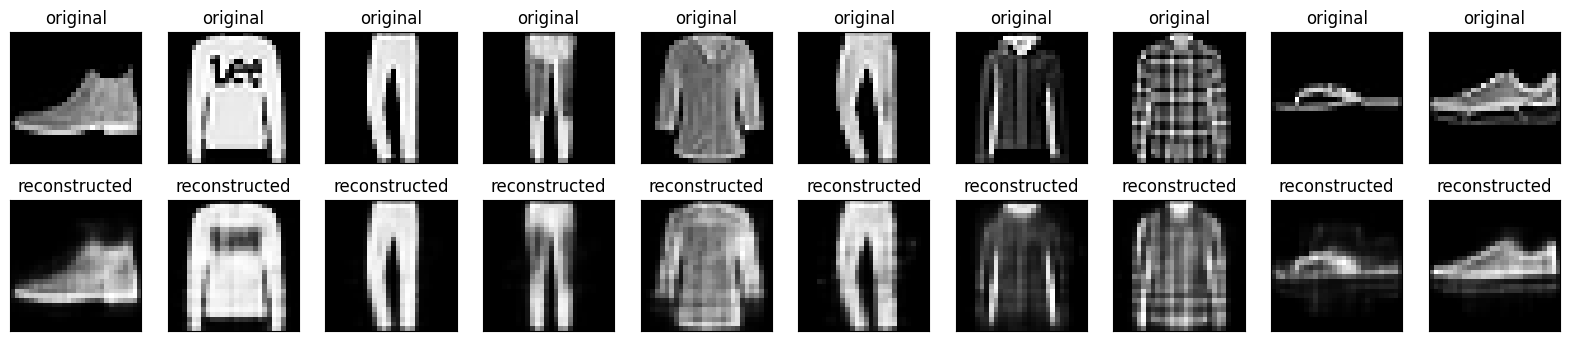

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Digit dataset Autoencoder

In [79]:
import tensorflow as tf
from tensorflow.keras import datasets

# Load MNIST dataset
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Display some information about the dataset
print("Number of training samples:", len(train_images))
print("Number of test samples:", len(test_images))
print("Image shape:", train_images[0].shape)
print("Labels:", set(train_labels))

Number of training samples: 60000
Number of test samples: 10000
Image shape: (28, 28, 1)
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


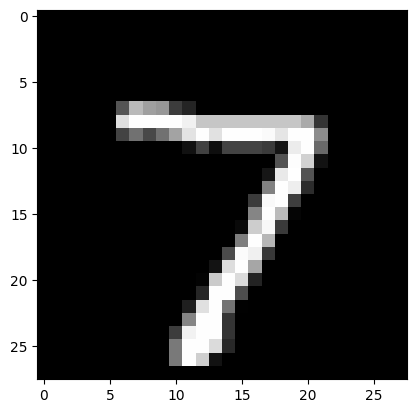

In [80]:
imgplot = plt.imshow(test_images[0])
imgplot

In [81]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = test_images.shape[1:]
latent_dim = 16
autoencoder = Autoencoder(latent_dim, shape)

In [82]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [83]:
autoencoder.fit(train_images, train_images,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0419 - val_loss: 0.1545
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - val_loss: 0.1591
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0232 - val_loss: 0.1406
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - val_loss: 0.1297
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - val_loss: 0.1282
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - val_loss: 0.1274
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - val_loss: 0.1277
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - val_loss: 0.1294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - val_loss: 0.1271
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [84]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

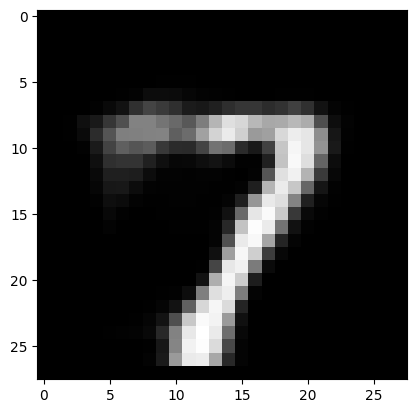

In [85]:
imgplot = plt.imshow(decoded_imgs[0])
imgplot

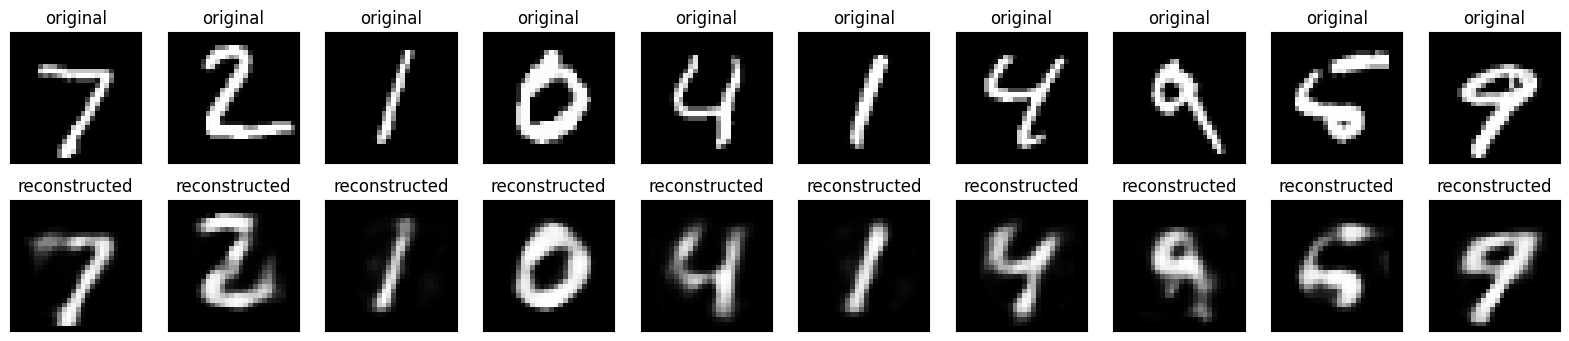

In [86]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Fashion dataset image denoising

In [63]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [64]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [65]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

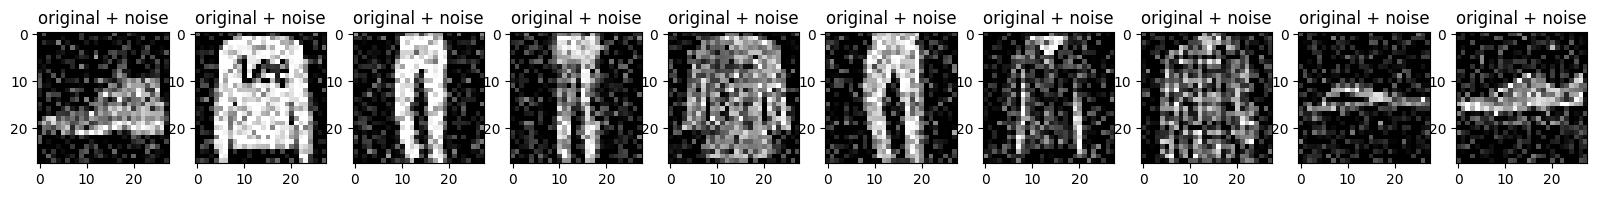

In [66]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [68]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [69]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [70]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0172 - val_loss: 0.0102
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [74]:
autoencoder.encoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
autoencoder.decoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 8)         584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


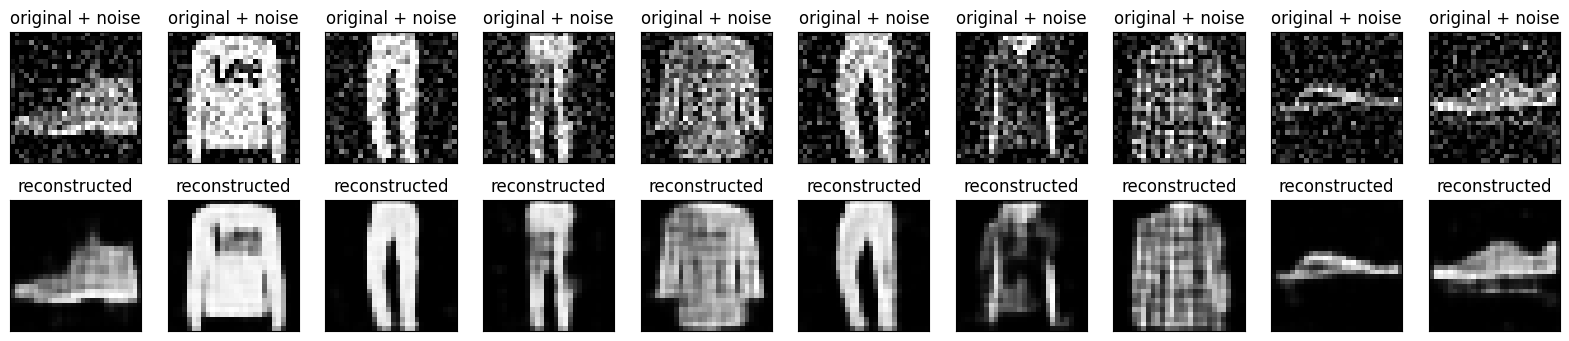

In [77]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

#Digit dataset image denoising

In [87]:
noise_factor = 0.2
x_train_noisy = train_images + noise_factor * tf.random.normal(shape=train_images.shape)
x_test_noisy = test_images + noise_factor * tf.random.normal(shape=test_images.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

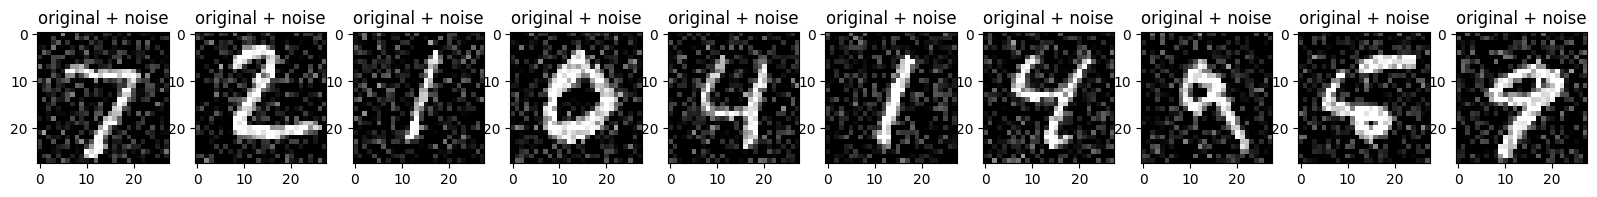

In [88]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()